# simplet net


 - softmax 는 확률값
 - loss 는 계산한 값과 확률 값을 리턴


4.4.2 신경망에서 기울기

- 입력    : X
- Affine  : XW+B
- sotfmax : Y=soft(XW+B)

$$ W = \left(\begin{array}{rrr}
w_{11}&w_{12}&w_{13}\\
w_{21}&w_{22}&w_{23}
\end{array}\right)$$

$$ \dfrac{\partial L}{\partial W} = \left(\begin{array}{rrr}
\dfrac{\partial L}{\partial w_{11}}&\dfrac{\partial L}{\partial w_{12}}&\dfrac{\partial L}{\partial w_{13}}\\
\dfrac{\partial L}{\partial w_{21}}&\dfrac{\partial L}{\partial w_{22}}&\dfrac{\partial L}{\partial w_{23}}
\end{array}\right)$$

- Cross entropy : L=-TlogY


$$ {W} = \left(\begin{array}{rrr}
w_{11} - a \dfrac{\partial L}{\partial w_{11}}&w_{12} - a \dfrac{\partial L}{\partial w_{12}}&w_{13} - a \dfrac{\partial L}{\partial w_{13}}\\
w_{21} - a \dfrac{\partial L}{\partial w_{21}}&w_{22} - a \dfrac{\partial L}{\partial w_{22}}&w_{23} - a \dfrac{\partial L}{\partial w_{23}}
\end{array}\right)$$

- W=W-a round L / round

SimpleNet을 위한 함수 구현

In [ ]:
import numpy as np

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) / y.shape[0]

#출처: https://kejdev.tistory.com/41 [Dev log:티스토리]

'''
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
'''

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

#def sigmoid(x):
#    return 1 / (1 + np.exp(-x))

def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val  # 값 복원
        it.iternext()
    return grad

Simple Network class 구현

In [ ]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
        self.B = np.zeros(3)          # 0으로 초기화

    def predict(self, x):
        return np.dot(x, self.W) + self.B

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        print(y.ndim)
        print(y)
        loss = cross_entropy_error(y, t)
        return loss

Instance 생성

In [ ]:
net = simpleNet()
print(net.W)

[[-2.03972     1.19025223  0.7129203 ]
 [-0.47620798 -0.49152392  1.42081502]]


dataset이 하나임

In [ ]:
#입력과 정답 설정
x = np.array([[0.6, 0.9]])
t = np.array([[0, 0, 1]])

In [ ]:
#파라미터 훈련전 예측
z=net.predict(x)
y = softmax(z)
print(y)

[[0.02731693 0.18711165 0.78557143]]


In [ ]:
for i in range(10000):
    f = lambda W: net.loss(x, t)
    dW = numerical_gradient(f, net.W)
    dB = numerical_gradient(f, net.B)

    # 6개의 파라미터가 0에 가까와지는지 확인
    print(dW)

    net.W -= 0.001 * dW
    net.B -= 0.001 * dB

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2
[[0.0066711  0.01957625 0.97375265]]
2
[[0.00667113 0.0195728  0.97375608]]
2
[[0.00667053 0.01957281 0.97375666]]
2
[[0.0066717  0.01957624 0.97375206]]
2
[[0.00667178 0.01957451 0.97375371]]
2
[[0.00667045 0.01957454 0.97375501]]
2
[[0.0066711  0.01957644 0.97375246]]
2
[[0.00667113 0.0195726  0.97375627]]
2
[[0.00667047 0.01957262 0.97375692]]
2
[[0.00667177 0.01957643 0.97375181]]
[[ 0.00400267  0.01174471 -0.01574738]
 [ 0.006004    0.01761707 -0.02362107]]
2
[[0.00667105 0.01957262 0.97375633]]
2
[[0.00667026 0.01957263 0.97375711]]
2
[[0.00667065 0.01957377 0.97375558]]
2
[[0.00667066 0.01957147 0.97375786]]
2
[[0.00667027 0.01957148 0.97375825]]
2
[[0.00667105 0.01957377 0.97375519]]
2
[[0.00667125 0.01957261 0.97375614]]
2
[[0.00667006 0.01957264 0.97375731]]
2
[[0.00667064 0.01957435 0.97375501]]
2
[[0.00667067 0.0195709  0.97375844]]
2
[[0.00667007 0.01957091 0.97375902]]
2
[[0.00667124 0.01957434 0.97375442]]
2
[[0.00667132 0.01957261 0

In [ ]:
#파라미터 훈련후 예측
z=net.predict(x)
y = softmax(z)
print(y)

[[0.00661095 0.01932693 0.97406212]]


#simplet net - 그래프 출력

In [ ]:
net = simpleNet()
print(net.W)

[[ 1.91850755 -1.33721743  0.05982083]
 [ 0.06486979  0.24083516  0.04047135]]


In [ ]:
x = np.array([[0.6, 0.9]])
t = np.array([[0, 0, 1]])

In [ ]:
#파라미터 훈련전 예측
z=net.predict(x)
y = softmax(z)
print(y)

[[0.67256658 0.11172438 0.21570904]]


In [ ]:
train_loss_list = []
for i in range(10000):
    f = lambda W: net.loss(x, t)
    dW = numerical_gradient(f, net.W)
    dB = numerical_gradient(f, net.B)
    #print(dW)

    loss = net.loss(x, t)
    print(loss)
    train_loss_list.append(loss)

    net.W -= 0.001 * dW
    net.B -= 0.001 * dB

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[[0.02052198 0.01271919 0.96675882]]
2
[[0.02051997 0.01271922 0.96676081]]
2
[[0.02052394 0.01272168 0.96675438]]
2
[[0.02052196 0.01272045 0.96675759]]
0.033807390661450665
2
[[0.02052084 0.01271921 0.96675994]]
2
[[0.02051843 0.01271924 0.96676232]]
2
[[0.02051962 0.01271998 0.9667604 ]]
2
[[0.02051965 0.01271847 0.96676187]]
2
[[0.02051845 0.01271849 0.96676306]]
2
[[0.02052083 0.01271997 0.96675921]]
2
[[0.02052145 0.0127192  0.96675935]]
2
[[0.02051783 0.01271925 0.96676292]]
2
[[0.02051961 0.01272036 0.96676003]]
2
[[0.02051966 0.0127181  0.96676224]]
2
[[0.02051785 0.01271812 0.96676403]]
2
[[0.02052142 0.01272033 0.96675824]]
2
[[0.02052165 0.0127192  0.96675915]]
2
[[0.02051763 0.01271925 0.96676312]]
2
[[0.02051961 0.01272048 0.9667599 ]]
2
[[0.02051966 0.01271797 0.96676236]]
2
[[0.02051765 0.012718   0.96676435]]
2
[[0.02052162 0.01272046 0.96675792]]
2
[[0.02051964 0.01271923 0.96676113]]
0.03380372785900056
2
[[0.02051853 0.01271799 0.

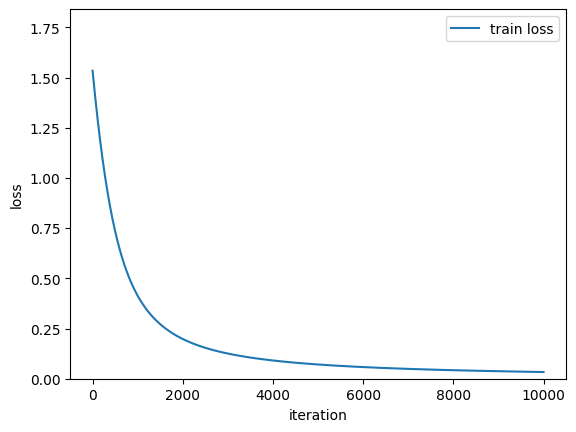

In [ ]:
import matplotlib.pyplot as plt

# 그래프 그리기
x_axis = np.arange(len(train_loss_list))
plt.plot(x_axis, train_loss_list, label='train loss')
plt.xlabel("iteration")
plt.ylabel("loss")
#plt.ylim(0, 2.5)
plt.ylim(0, train_loss_list[0] * 1.2 )
plt.legend()                   # 위
#plt.legend(loc='lower right') # 아래
plt.show()

In [ ]:
#파라미터 훈련후 예측
z=net.predict(x)
y = softmax(z)
print(y)

[[0.01716729 0.01189472 0.97093798]]


#back propagation 적용 SimpleNet 학습

In [ ]:
net = simpleNet()
print(net.W)

[[ 0.62949121 -0.77585889 -0.3674292 ]
 [ 0.65957305 -0.26390649 -0.60627507]]


In [ ]:
x = np.array([[0.6, 0.9]])
t = np.array([[0, 0, 1]])

In [ ]:
#파라미터 훈련전 예측
z=net.predict(x)
y = softmax(z)
print(y)

[[0.73345716 0.137473   0.12906984]]


In [ ]:
train_loss_list = []
for i in range(10000):
    z=np.dot(x, net.W) + net.B
    y = softmax(z)
    #print(y)

    dy = (y - t)
    dW = np.dot(x.T, dy)
    dB = np.sum(dy, axis=0)


    loss = net.loss(x, t)
    print(loss)
    train_loss_list.append(loss)

    net.W -= 0.001 * dW
    net.B -= 0.001 * dB

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
0.07590563594966562
0.07588794418435042
0.07587026040118924
0.0758525845949048
0.07583491676022433
0.07581725689187967
0.07579960498460762
0.07578196103314856
0.07576432503224831
0.07574669697665692
0.07572907686112934
0.07571146468042392
0.07569386042930505
0.07567626410254044
0.07565867569490312
0.07564109520116988
0.07562352261612298
0.07560595793454834
0.0755884011512366
0.07557085226098299
0.07555331125858751
0.07553577813885401
0.0755182528965912
0.07550073552661216
0.07548322602373471
0.07546572438278089
0.07544823059857711
0.07543074466595429
0.07541326657974803
0.0753957963347982
0.07537833392594905
0.07536087934804937
0.07534343259595226
0.07532599366451537
0.07530856254860095
0.07529113924307505
0.07527372374280912
0.07525631604267778
0.07523891613756106
0.07522152402234292
0.07520413969191209
0.0751867631411611
0.07516939436498742
0.0751520333582926
0.07513468011598272
0.07511733463296781
0.0750999969041631
0.07508266692448733
0.075065344

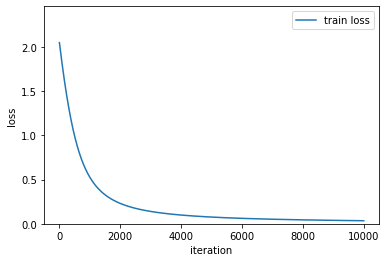

In [ ]:
import matplotlib.pyplot as plt

# 그래프 그리기
x_axis = np.arange(len(train_loss_list))
plt.plot(x_axis, train_loss_list, label='train loss')
plt.xlabel("iteration")
plt.ylabel("loss")
#plt.ylim(0, 2.5)
plt.ylim(0, train_loss_list[0] * 1.2 )
plt.legend()                   # 위
#plt.legend(loc='lower right') # 아래
plt.show()



In [ ]:
#파라미터 훈련후 예측
z=net.predict(x)
y = softmax(z)
print(y)

[[0.02004103 0.01401137 0.9659476 ]]
